In [1]:
from sagemaker.estimator import Estimator, Transformer

In [2]:
bucket = 'sagemaker-us-east-1-058528764918'

In [3]:
prefix = 'vpc'     # subcarpeta de guardado
model_prefix = 'model'
output_path = 's3://{}/{}/victor'.format(bucket, prefix)
print(output_path)

model_output = "{}/{}/ouput_2".format(output_path, model_prefix)
print(model_output)

s3://sagemaker-us-east-1-058528764918/vpc/victor
s3://sagemaker-us-east-1-058528764918/vpc/victor/model/ouput_2


In [4]:
model_code = 'xgboost-vpc-210604-1710-016-8f8a7268'

model = Estimator.attach(model_code)
model


2021-06-04 17:18:12 Starting - Preparing the instances for training
2021-06-04 17:18:12 Downloading - Downloading input data
2021-06-04 17:18:12 Training - Training image download completed. Training in progress.
2021-06-04 17:18:12 Uploading - Uploading generated training model
2021-06-04 17:18:12 Completed - Training job completed


In [5]:
inference_model = model.transformer(
    instance_count=1, 
    instance_type='ml.m5.xlarge', 
    output_path=model_output,
    strategy='MultiRecord'
)

In [6]:
validation_set = 's3://sagemaker-us-east-1-058528764918/vpc/victor/validation_set_sin_target.csv'

In [7]:
inference_model.transform(
    validation_set,
    split_type='Line',
    content_type='text/csv'
)

...........................
[2021-06-04 19:55:34 +0000] [14] [INFO] Starting gunicorn 19.10.0
[2021-06-04 19:55:34 +0000] [14] [INFO] Listening at: unix:/tmp/gunicorn.sock (14)
[2021-06-04 19:55:34 +0000] [14] [INFO] Using worker: gevent
[2021-06-04 19:55:34 +0000] [21] [INFO] Booting worker with pid: 21
[2021-06-04 19:55:34 +0000] [22] [INFO] Booting worker with pid: 22
[2021-06-04 19:55:34 +0000] [23] [INFO] Booting worker with pid: 23
[2021-06-04 19:55:34 +0000] [27] [INFO] Booting worker with pid: 27
[2021-06-04:19:55:39:INFO] No GPUs detected (normal if no gpus installed)
169.254.255.130 - - [04/Jun/2021:19:55:39 +0000] "GET /ping HTTP/1.1" 200 0 "-" "Go-http-client/1.1"
[2021-06-04:19:55:39:INFO] No GPUs detected (normal if no gpus installed)
169.254.255.130 - - [04/Jun/2021:19:55:39 +0000] "GET /execution-parameters HTTP/1.1" 200 84 "-" "Go-http-client/1.1"
[2021-06-04:19:55:40:INFO] No GPUs detected (normal if no gpus installed)
[2021-06-04:19:55:40:INFO] Determined delimiter o

In [11]:
import pandas as pd
data = pd.read_csv('s3://sagemaker-us-east-1-058528764918/vpc/victor/model/ouput_2/validation_set_sin_target.csv.out', header=None)
data.columns= ['result']
data.head()

,result
0,0.438077
1,0.438077
2,0.438077
3,0.438077
4,0.438077


<AxesSubplot:>

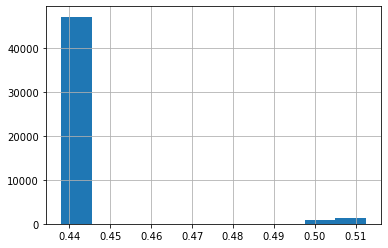

In [12]:
data['result'].hist()

In [10]:
data.shape  # 49362

(49362, 1)

In [ ]:
print(help(inference_model.transform))

In [ ]:
print(dir(inference_model))

In [ ]:
inference_model.model_name

In [ ]:
help(model.transformer)

In [ ]:
#print(dir(model))

In [ ]:
#683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-xgboost:0.90-1-cpu-py3